# Daniel Alejandro Mesa Arango - 201710054010 - Computacion Cuantica

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import random_state, vector2latex
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
from qiskit.extensions import Initialize
import numpy as np
# Loading your IBM Q account(s) 
provider = IBMQ.load_account()

Teleportacion Cuantica

Creacion del circuito para la teleportacion

In [27]:
qr = QuantumRegister(3)    #Creamos los qubits necesarios, tres en este caso (se inician en estado 0)
crz = ClassicalRegister(1) # Creamos los dos registros clasicos para almacenar el resultado
crx = ClassicalRegister(1) 
teleportation_circuit = QuantumCircuit(qr, crz, crx) #Circuito
#teleportation_circuit.x(qr[0])#si necesitamos que el qubit a teleportar sea 1

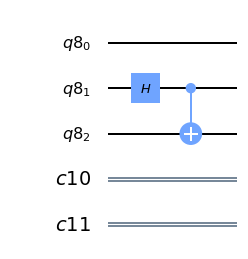

In [28]:
#Definimos la creacion del par de bell, que superpone el primer qubit y los entrelaza
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) 
    qc.cx(a,b) 

# Ejecucion de la funcion anterior
create_bell_pair(teleportation_circuit, 1, 2)
# Dibujos el circuito hasta el momento
teleportation_circuit.draw()

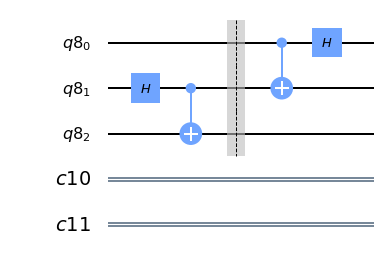

In [29]:
#Con esta funcion alice puede codificar el mensaje, recibiendo el circuito y los dos primeros qubits
#luego entrelaza los qubits y los pone en estado de superposicion (siendo psi el mensaje o qubit 
#teleportar con informacion)
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    
teleportation_circuit.barrier() # Barrera
alice_gates(teleportation_circuit, 0, 1)
#Dibujo del circuito hasta el momento
teleportation_circuit.draw()

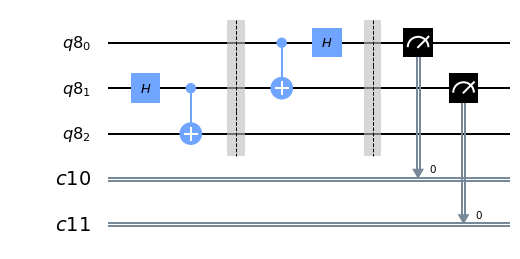

In [30]:
#Envio del mensaje, recibe el circuito y los dos primeros qubits, luego se colapsan, y se envia 
#el resultado de esta medicion que es el mensaje codificado
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)#se guardan los resultados en los registros clasicos
    qc.measure(b,1)

measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

In [31]:
# La funcion toma el circuito, un qubit y dos registros clasicos, en la funcion se decide que copuerta
#aplicar para la decodificacion del mensaje
def bob_gates(qc, qubit, crz, crx):
    #con c_if podemos controlar las compuertas usando un bit clasico en lugar de un qubit
    qc.x(qubit).c_if(crx, 1) # Si los registros estan en el estado uno, se aplican las compuertas
    qc.z(qubit).c_if(crz, 1)

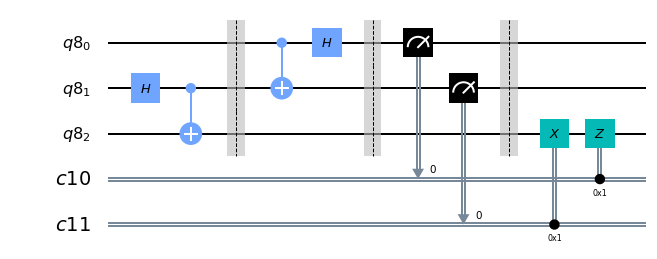

In [32]:
teleportation_circuit.barrier() #Barrera
bob_gates(teleportation_circuit, 2, crz, crx) #Se aplica la funcion anterior
#se dibuja el circuito final
#teleportation_circuit.measure(2, 1)
teleportation_circuit.draw()

In [33]:
backend = Aer.get_backend('statevector_simulator')
Statevector = execute(teleportation_circuit,backend).result().get_statevector()
array_to_latex(Statevector, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

Ejecucion del circuito con statevector, se usa el mismo protocolo

<IPython.core.display.Math object>

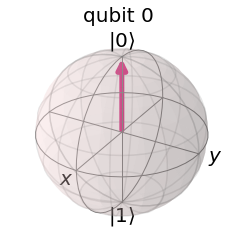

In [34]:
#Este sea el estado a enviar
psi = [1, 0]

# Mostramos graficamente el estado
vector2latex(psi, pretext="|\\psi\\rangle =")
plot_bloch_multivector(psi)

In [35]:
#inicializamos el qubit
init_gate = Initialize(psi)

In [36]:
qr2 = QuantumRegister(3)   # Usamos los 3 qubits necesarios para la ejecucion
crz2 = ClassicalRegister(1) # y los dos registros clasicos
crx2 = ClassicalRegister(1)
qc2 = QuantumCircuit(qr2, crz2, crx2) #creacmos el circuito

# Fprimero inicializamos el qubit de alice
qc2.append(init_gate, [0])
qc2.barrier() 

# Empezamos los pasos para la teleportacion, creando el par de bell
qc2.h(1) 
qc2.cx(1,2) 
qc2.barrier()
# se envia q1 a alice y q2 a bob
qc2.cx(0, 1)
qc2.h(0)
# Alice envia el mensaje a bob
qc2.barrier()
qc2.measure(0,0)#se guardan los resultados en los registros clasicos
qc2.measure(1,1)
# Bob decodifica el mensaje que recibio
#con c_if podemos controlar las compuertas usando un bit clasico en lugar de un qubit
qc2.x(2).c_if(crx2, 1) # Si los registros estan en el estado uno, se aplican las compuertas
qc2.z(2).c_if(crz2, 1)
#qc2.draw()

In [37]:
backend = Aer.get_backend('statevector_simulator')
Statevector2 = execute(qc2,backend).result().get_statevector()
array_to_latex(Statevector2, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

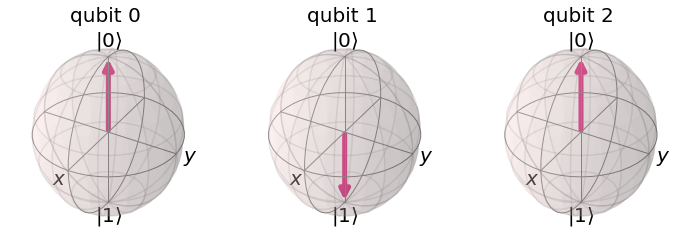

In [38]:
#podemos ver que el qubit fue teleportando observando el qubit 2
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc2, backend).result().get_statevector()
plot_bloch_multivector(out_vector)